## Overview

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

# About the DataSet

This dataset is taken from Kaggle and was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.

We will using the CRISP-DM framework for understanding the data, cleaning and applying various models for better accuracy.

# Business Understanding

The objective is to build a machine learning model using Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

We will be using several machine learning classification techniques for the same.
* Logistic Regression
* KNN
* Decision Trees
* Naive Bayes
* Random Forest

# Data Understaning

In [93]:
# Initial Setup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [94]:
# Load Data
covid19 = pd.read_csv("data/Covid-Data.csv")


In [95]:
covid19.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [96]:
covid19.shape

(1048575, 21)

In [97]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [98]:
covid19.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

No null values in the data, we can examine for values.

In [99]:
# Check the uniq values
for column in covid19:
    print(column, "=>", covid19[column].unique())

USMER => [2 1]
MEDICAL_UNIT => [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX => [1 2]
PATIENT_TYPE => [1 2]
DATE_DIED => ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '09/05/2020' '10/05/2020'
 '11/05/2020' '12/05/2020' '13/05/2020' '14/05/2020' '15/05/2020'
 '16/05/2020' '17/05/2

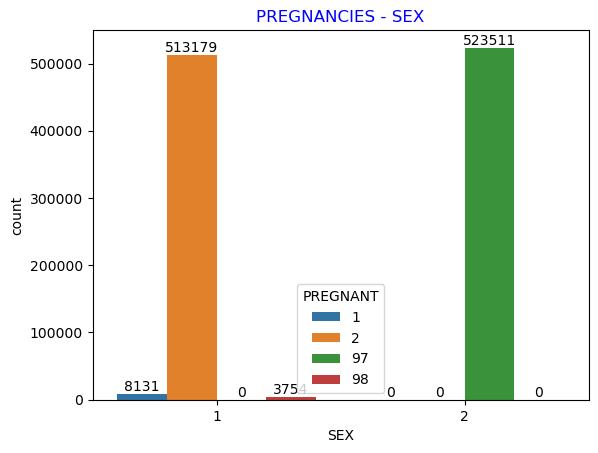

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
ax = sns.countplot(data=covid19, 
                   x=covid19.SEX, 
                   hue=covid19.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="blue");

We see 97 value for males and since male cannot be pregnant replace it with 2

In [101]:
covid19.PREGNANT = covid19.PREGNANT.replace(97,2)

As we can see some of the fields have 97, 98 & 99 values. These represent the missing data for that patient. 
I will be taking only non-missing values for each of the fields.


In [102]:
covid19 = covid19[(covid19.CLASIFFICATION_FINAL < 4)]
covid19 = covid19[(covid19.SEX == 1) | (covid19.SEX == 2)]
covid19 = covid19[(covid19.USMER == 1) | (covid19.USMER == 2)]
covid19 = covid19[(covid19.PATIENT_TYPE == 1) | (covid19.PATIENT_TYPE == 2)]
covid19 = covid19[(covid19.PNEUMONIA == 1) | (covid19.PNEUMONIA == 2)]
covid19 = covid19[(covid19.DIABETES == 1) | (covid19.DIABETES == 2)]
covid19 = covid19[(covid19.COPD == 1) | (covid19.COPD == 2)]
covid19 = covid19[(covid19.ASTHMA == 1) | (covid19.ASTHMA == 2)]
covid19 = covid19[(covid19.INMSUPR == 1) | (covid19.INMSUPR == 2)]
covid19 = covid19[(covid19.HIPERTENSION == 1) | (covid19.HIPERTENSION == 2)]
covid19 = covid19[(covid19.OTHER_DISEASE == 1) | (covid19.OTHER_DISEASE == 2)]
covid19 = covid19[(covid19.CARDIOVASCULAR == 1) | (covid19.CARDIOVASCULAR == 2)]
covid19 = covid19[(covid19.OBESITY == 1) | (covid19.OBESITY == 2)]
covid19 = covid19[(covid19.RENAL_CHRONIC == 1) | (covid19.RENAL_CHRONIC == 2)]
covid19 = covid19[(covid19.TOBACCO == 1) | (covid19.TOBACCO == 2)]
covid19 = covid19[(covid19.PREGNANT == 1) | (covid19.PREGNANT == 2)]

In [103]:
# Check the uniq values
for column in covid19:
    print(column, "=>", covid19[column].unique())

USMER => [2 1]
MEDICAL_UNIT => [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX => [1 2]
PATIENT_TYPE => [1 2]
DATE_DIED => ['03/05/2020' '09/06/2020' '21/06/2020' '9999-99-99' '28/03/2020'
 '29/03/2020' '02/04/2020' '05/04/2020' '06/04/2020' '07/04/2020'
 '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020' '13/04/2020'
 '14/04/2020' '15/04/2020' '17/04/2020' '18/04/2020' '20/04/2020'
 '21/04/2020' '22/04/2020' '23/04/2020' '24/04/2020' '25/04/2020'
 '26/04/2020' '27/04/2020' '28/04/2020' '29/04/2020' '30/04/2020'
 '01/05/2020' '02/05/2020' '04/05/2020' '05/05/2020' '06/05/2020'
 '07/05/2020' '08/05/2020' '09/05/2020' '10/05/2020' '11/05/2020'
 '12/05/2020' '13/05/2020' '14/05/2020' '15/05/2020' '16/05/2020'
 '17/05/2020' '18/05/2020' '19/05/2020' '20/05/2020' '21/05/2020'
 '22/05/2020' '23/05/2020' '24/05/2020' '25/05/2020' '26/05/2020'
 '27/05/2020' '28/05/2020' '29/05/2020' '30/05/2020' '31/05/2020'
 '01/06/2020' '02/06/2020' '03/06/2020' '04/06/2020' '05/06/2020'
 '06/06/2020' '07/06/2

In [104]:
covid19.SEX = covid19.SEX.apply(lambda x: x if x == 1 else 0)
covid19.USMER = covid19.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
covid19.PATIENT_TYPE = covid19.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)
covid19.PNEUMONIA = covid19.PNEUMONIA.apply(lambda x: x if x == 1 else 0)
covid19.DIABETES = covid19.DIABETES.apply(lambda x: x if x == 1 else 0)
covid19.COPD = covid19.COPD.apply(lambda x: x if x == 1 else 0)
covid19.ASTHMA = covid19.ASTHMA.apply(lambda x: x if x == 1 else 0)
covid19.INMSUPR = covid19.INMSUPR.apply(lambda x: x if x == 1 else 0)
covid19.HIPERTENSION = covid19.HIPERTENSION.apply(lambda x: x if x == 1 else 0)
covid19.OTHER_DISEASE = covid19.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)
covid19.CARDIOVASCULAR = covid19.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0)
covid19.OBESITY = covid19.OBESITY.apply(lambda x: x if x == 1 else 0)
covid19.RENAL_CHRONIC = covid19.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)
covid19.TOBACCO = covid19.TOBACCO.apply(lambda x: x if x == 1 else 0)
covid19.DATE_DIED = covid19.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
covid19.PREGNANT = covid19.PREGNANT.apply(lambda x: x if x == 1 else 0)
covid19.INTUBED = covid19.INTUBED.apply(lambda x: x if x == 1 else 0)
covid19.ICU = covid19.ICU.apply(lambda x: x if x == 1 else 0)

Create a label column as AT_RISK using the thres fields DATE_DIED, INTUBED and ICU

In [105]:
covid19['AT_RISK'] = covid19['DATE_DIED'] + covid19['INTUBED'] + covid19['ICU']
covid19.AT_RISK = covid19.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 


In [106]:
# Drop a few columns which are intuitively not longer useful
covid19.drop(columns = ['CLASIFFICATION_FINAL', 'INTUBED', 'ICU', 'DATE_DIED'], inplace=True)


In [107]:
# Check the uniq values
for column in covid19:
    print(column, "=>", covid19[column].unique())

USMER => [0 1]
MEDICAL_UNIT => [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX => [1 0]
PATIENT_TYPE => [0 1]
PNEUMONIA => [1 0]
AGE => [ 65  55  68  40  64  37  25  38  24  30  48  23  80  61  54  59  45  26
  32  49  39  27  57  20  56  47  50  46  17  41   2  10   1  12  14  53
  43  86  90  88  60  42  72  74  83  84  66  70  62  58  71  79  63  82
  67  69  77  92  34  52  78  73  76  51  44  87  75  81  22  36  85  31
  89   3   0  97  93  95  35 100   5   6  91   4  33  28  21  15  29  19
  18 103  13   7  11   9  16   8  94  96  99  98 116 101 105 104 102 120
 106]
PREGNANT => [0 1]
DIABETES => [0 1]
COPD => [0 1]
ASTHMA => [0 1]
INMSUPR => [0 1]
HIPERTENSION => [1 0]
OTHER_DISEASE => [0 1]
CARDIOVASCULAR => [0 1]
OBESITY => [0 1]
RENAL_CHRONIC => [0 1]
TOBACCO => [0 1]
AT_RISK => [1 0]


# Visualize the data


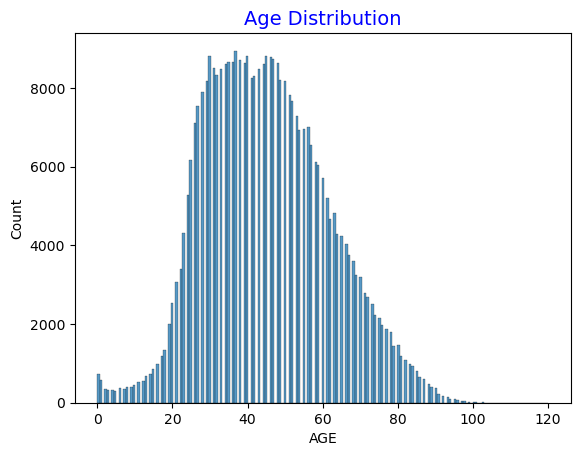

In [108]:
# Age Distribution
sns.histplot(x=covid19.AGE)
plt.title("Age Distribution", color="blue", fontsize=14);

Patients are roughly between 20-60 years old.

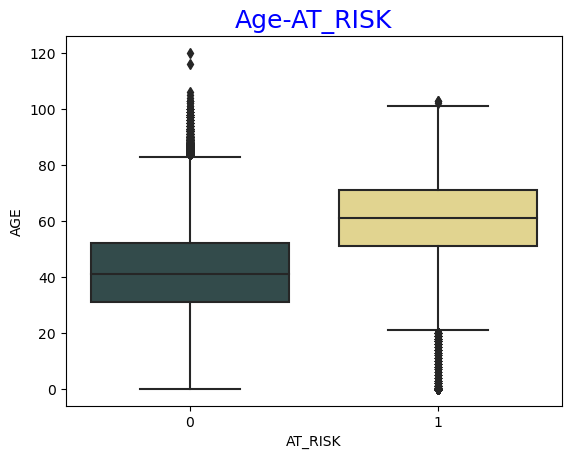

In [109]:
sns.boxplot(x="AT_RISK", y="AGE",data=covid19,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-AT_RISK",fontsize=18, color="blue");

Older patients have more risk than younger patients.

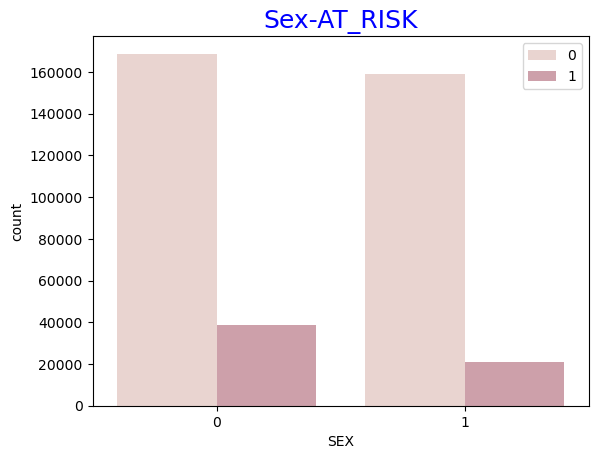

In [119]:
sns.countplot(x=covid19.SEX,hue=covid19.AT_RISK, palette=sns.cubehelix_palette(5))
plt.title("Sex-AT_RISK",fontsize=18, color="blue")
plt.legend(loc="best");

Males are at more risk than females

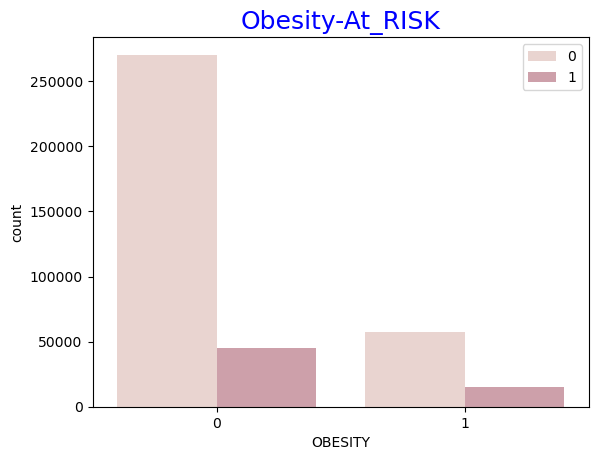

In [120]:
sns.countplot(x=covid19.OBESITY,hue=covid19.AT_RISK, palette=sns.cubehelix_palette(5))
plt.title("Obesity-At_RISK",fontsize=18, color="blue")
plt.legend(loc="best");

Patients with obesity have more risk than the rest

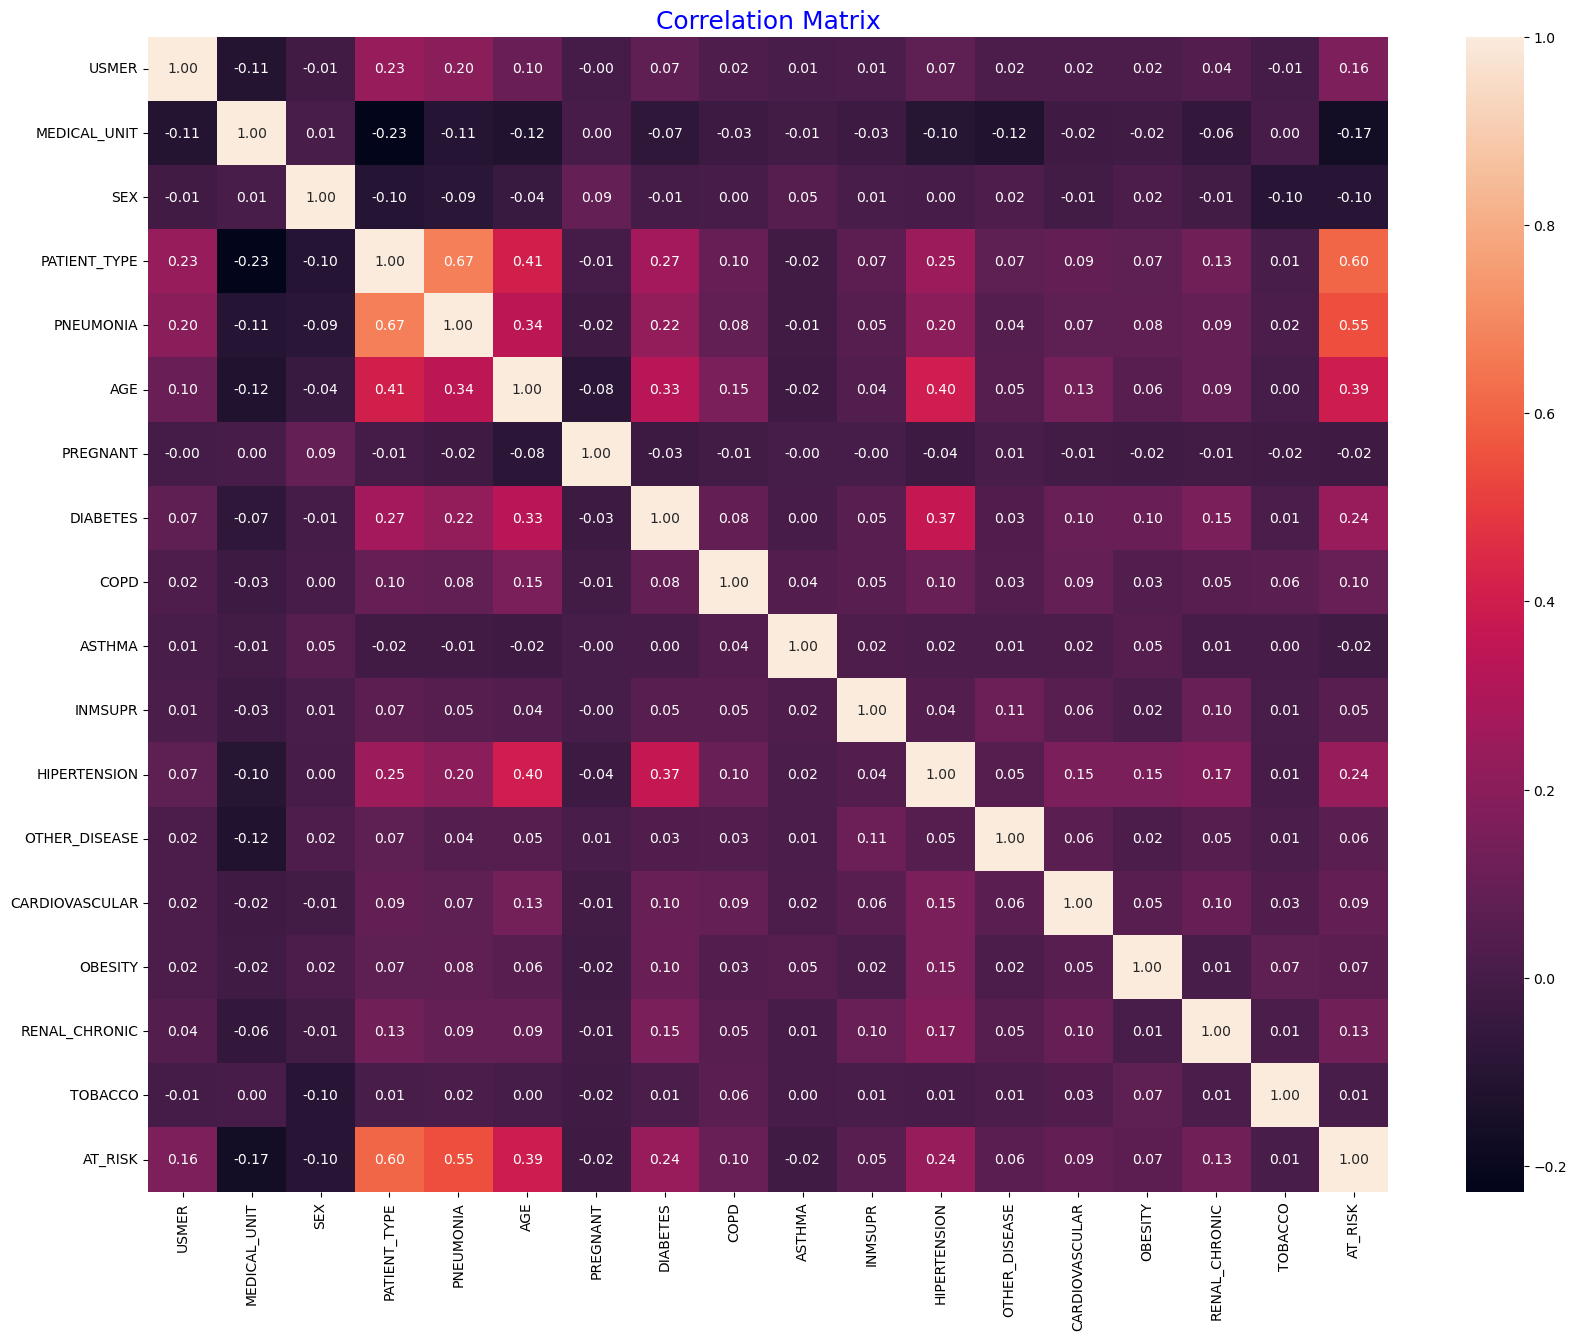

In [121]:
# Correlation
plt.figure(figsize=(20,15))
sns.heatmap(covid19.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix",fontsize=18,color="blue");


## Fetures Selection

In [122]:
# Feature selection and split the data
# Drop the non correlated features
drop_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

covid19.drop(columns=drop_columns, inplace=True)

In [123]:
covid19.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,AT_RISK
0,0,1,0,1,65,0,1,0,1
2,0,1,1,0,55,1,0,0,1
4,0,1,0,0,68,1,1,0,1
5,0,1,1,1,40,0,0,0,0
6,0,1,0,0,64,0,0,0,0


# Train and Split

#### Split the data 20% as test with random_state =42

In [124]:
X = covid19.drop(columns="AT_RISK")
y = covid19["AT_RISK"]

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (310076, 8)
X_test : (77520, 8)
y_train : (310076,)
y_test : (77520,)


# Modeling

## Logistic Regression


In [126]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Logistic Regression Accuracy :",logreg.score(X_test, y_test))
predictions = logreg.predict(X_test)

Logistic Regression Accuracy : 0.889280185758514


/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 Score : [0.93484548 0.63174154]


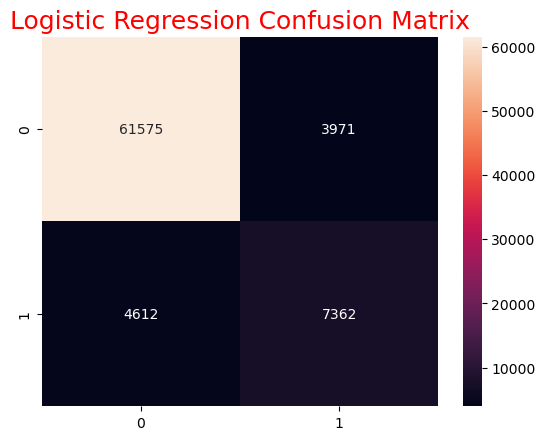

In [127]:
# Score logistic regression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

print("Logistic Regression F1 Score :",f1_score(y_test,predictions,average=None))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");


### Findings
* Logistic Regression gave good accuracy
* Accuracy is not sufficient, thats why we calculated the F1 Score says, and it predicted well for people who are alive and cannot the same for at risk patients.
* From the confusion matrix, we can say the main issue is due to imbalance data set.

[Text(0, 0, '327664'), Text(0, 0, '59932')]

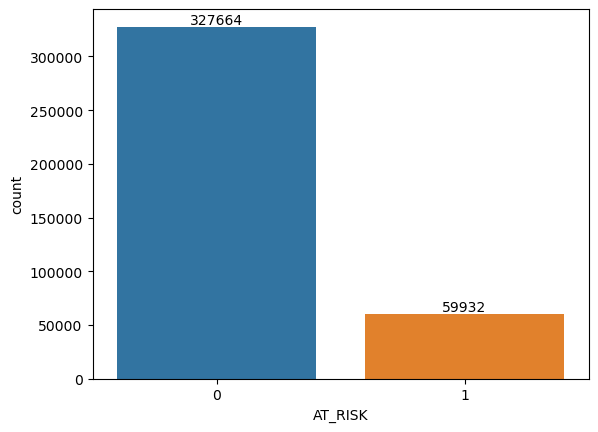

In [128]:
# AT_RISK Distribution
ax = sns.countplot(data=covid19, x='AT_RISK')
plt.bar_label(ax.containers[0])


### Unbalanced data - Fix using undersampling

As you see from the above, the AT_RISK distributed unevenly. 
We are going to use undersampling technique for solving this problem.

In [129]:
from imblearn.under_sampling import RandomUnderSampler

random_sampler = RandomUnderSampler(random_state=42)
X_resampled,y_resampled = random_sampler.fit_resample(X,y)

<Axes: xlabel='AT_RISK', ylabel='count'>

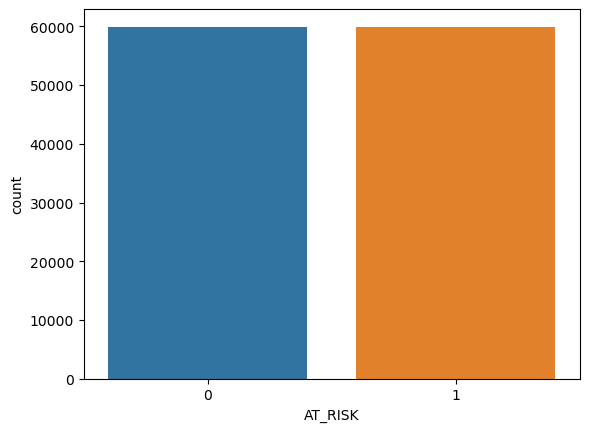

In [130]:
y_resampled.value_counts()
sns.countplot(x=y_resampled)

After resampling, we can see the sampled data is balanced. 
We will use the sampled and balanced data for predictions using various models.


In [131]:
# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)


In [132]:
X_train.shape

(95891, 8)

In [133]:
y_train.shape

(95891,)

In [134]:
X_test.shape

(23973, 8)

In [135]:
y_test.shape

(23973,)

# Logistic regression with balanced data

/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


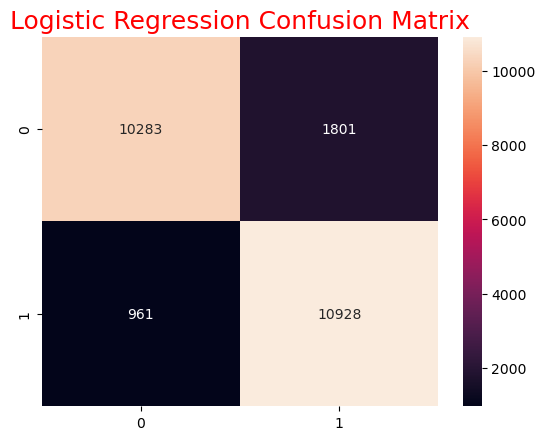

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report



lgr = Pipeline([
    ('scaler', StandardScaler()),
    ('lgr', LogisticRegression())
])

lgr_params = {'lgr__penalty' : ['l2'],
             'lgr__fit_intercept' : [True, False]}


lgr_grid = RandomizedSearchCV(estimator = lgr,
                   param_distributions = lgr_params)

lgr_grid.fit(X_train, y_train)
predictions = lgr_grid.predict(X_test)
lgr_params = lgr_grid.best_params_
lgr_acc = lgr_grid.score(X_test, y_test)
lgr_rec = recall_score(y_test, predictions)
lgr_f1 = f1_score(y_test, predictions)

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

In [137]:
lgr_params


{'lgr__penalty': 'l2', 'lgr__fit_intercept': False}

Now, we see balanced data with good Accuracy and F1 score.

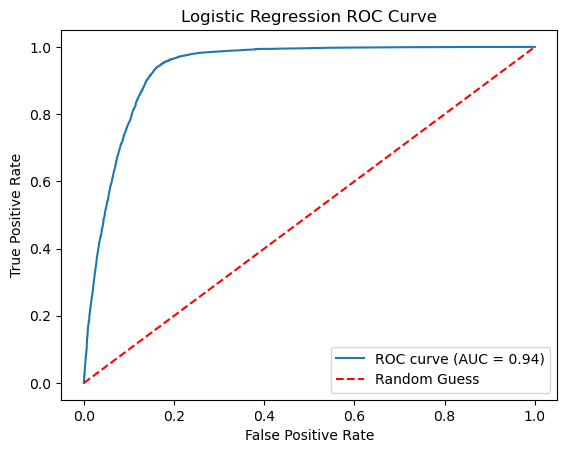

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_prob = lgr_grid.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()

# Display the plot
plt.show()


## KNN


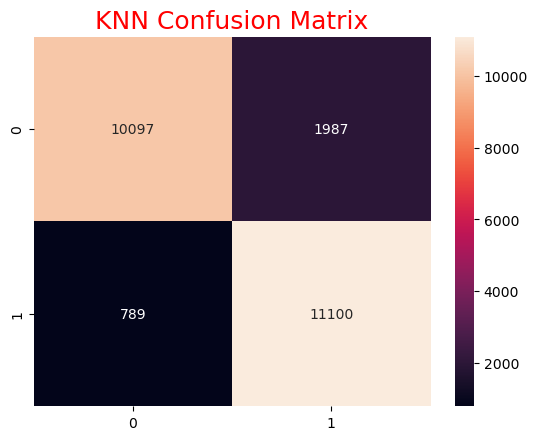

In [139]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


knn_params = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_grid = RandomizedSearchCV(estimator = pipeline,
                   param_distributions = knn_params)


knn_grid.fit(X_train, y_train)
predictions = knn_grid.predict(X_test)
knn_params = knn_grid.best_params_
knn_acc = knn_grid.score(X_test, y_test)
knn_rec = recall_score(y_test, predictions)
knn_f1 = f1_score(y_test, predictions)

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix",fontsize=18, color="red");



## KNN ROC

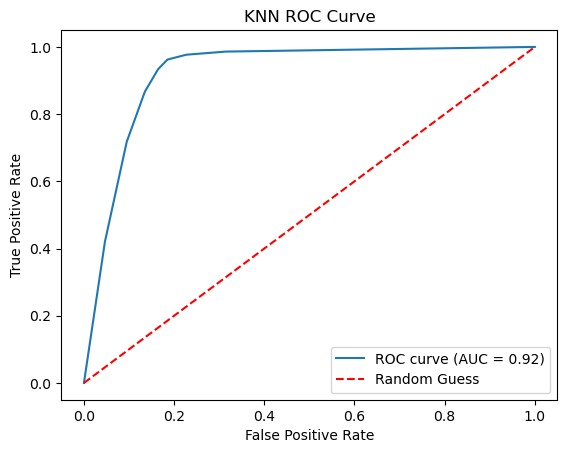

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_prob = knn_grid.predict_proba(X_test)[:, 1]


# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()

# Display the plot
plt.show()

## Decision Tree Classfifier

/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  F

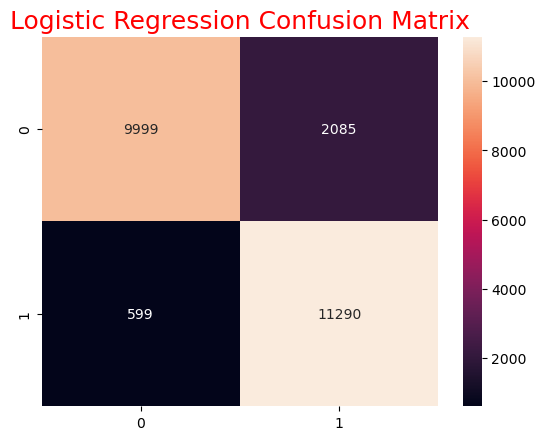

In [141]:
# Decision Tree Classifier

tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier())
])

tree_params = {'tree__criterion' : ['gini', 'entropoy'],
              'tree__max_depth' : [None, 1, 2, 3, 4],
              'tree__min_samples_split' : [1, 2, 3, 4]}


tree_grid = RandomizedSearchCV(estimator = tree,
                   param_distributions = tree_params)


tree_grid.fit(X_train, y_train)
predictions = tree_grid.predict(X_test)
tree_params = tree_grid.best_params_
tree_acc = tree_grid.score(X_test, y_test)
tree_rec = recall_score(y_test, predictions)
tree_f1 = f1_score(y_test, predictions)


sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");


## Decision Tree ROC Curve


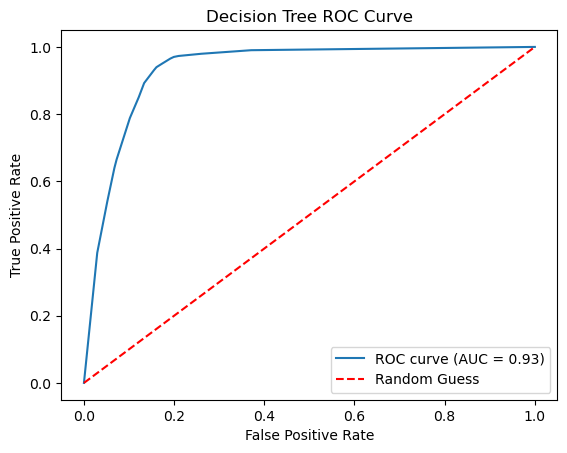

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_prob = tree_grid.predict_proba(X_test)[:, 1]


# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()

# Display the plot
plt.show()


## Naive Bayes

/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


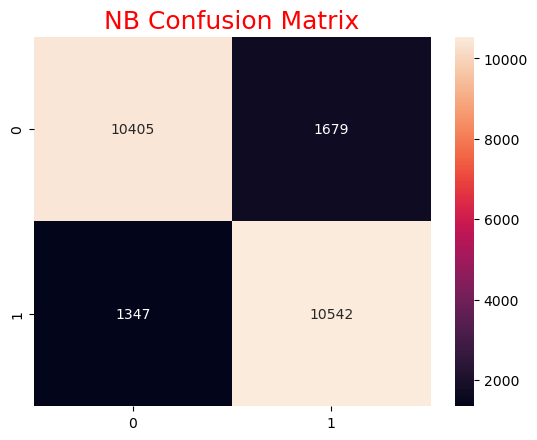

In [143]:
from sklearn.naive_bayes import GaussianNB

# nb model

nb = Pipeline([
    ('scalar', StandardScaler()),
    ('bayes', GaussianNB())
])



#grid search 
nb_grid = RandomizedSearchCV(estimator = nb,
                            param_distributions = {})

nb_grid.fit(X_train, y_train)

predictions = nb_grid.predict(X_test)
nb_params = nb_grid.best_params_
nb_acc = nb_grid.score(X_test, y_test)
nb_rec = recall_score(y_test, predictions)
nb_f1 = f1_score(y_test, predictions)

sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".0f")
plt.title("NB Confusion Matrix",fontsize=18, color="red");


## Naive Bayes ROC Curve

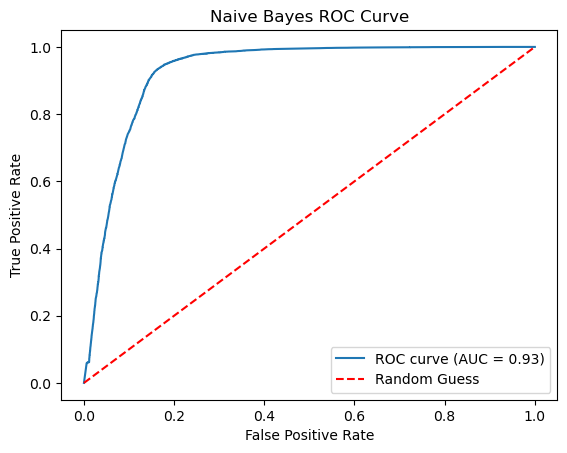

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_prob = nb_grid.predict_proba(X_test)[:, 1]


# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend()

# Display the plot
plt.show()


## Random Forest Classifier

/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/v0g044g/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transfor

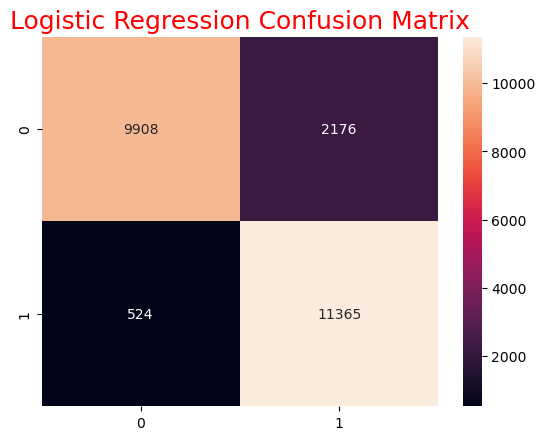

In [185]:
from sklearn.feature_selection import SelectKBest


pipeline = Pipeline([
    ('select', SelectKBest(k=10)),
    ('scalar', StandardScaler()),
    ('rf', RandomForestClassifier())
])

tree_params = {'rf__criterion' : ['gini', 'entropoy'],
              'rf__max_depth' : [None, 5, 10],
              'rf__min_samples_split' : [2,5,10],
              'select__k': [5, 10, 15], }


rf_tree_grid = RandomizedSearchCV(estimator = pipeline,
                   param_distributions = tree_params)


rf_tree_grid

rf_tree_grid.fit(X_train, y_train)
predictions = rf_tree_grid.predict(X_test)
rf_tree_params = rf_tree_grid.best_params_
rf_tree_acc = rf_tree_grid.score(X_test, y_test)
rf_tree_rec = recall_score(y_test, predictions)
rf_tree_f1 = f1_score(y_test, predictions)


sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");


In [186]:
best_model = rf_tree_grid.best_estimator_

# Get the feature importances
feature_importances = best_model.named_steps['rf'].feature_importances_

# Get the selected feature indices from the SelectKBest step
selected_feature_indices = best_model.named_steps['select'].get_support(indices=True)

# Get the column names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Create a dictionary of feature importance with corresponding feature names
feature_importance_dict = dict(zip(selected_feature_names, feature_importances))

feature_importance_dict

{'PATIENT_TYPE': 0.5738453452374209,
 'PNEUMONIA': 0.24827651295809022,
 'AGE': 0.14527962392496763,
 'DIABETES': 0.014647142028060979,
 'HIPERTENSION': 0.017951375851460307}

In [170]:
## Random Tree ROC Curve

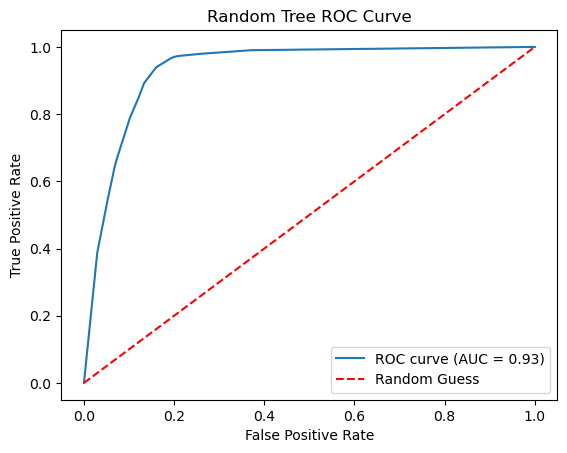

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities for the positive class
y_prob = tree_grid.predict_proba(X_test)[:, 1]


# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Tree ROC Curve')
plt.legend()

# Display the plot
plt.show()

In [173]:
results_df = pd.DataFrame({'model': ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Random Forest', 'KNN'], 
              'best_params': [lgr_params, tree_params, nb_params, rf_tree_params, knn_params],
              'accuracy': [lgr_acc, tree_acc, nb_acc, rf_tree_acc, knn_acc],
              'recall' : [lgr_rec, tree_rec, nb_rec, rf_tree_rec, knn_rec],
              'f1' : [lgr_f1, tree_f1, nb_f1, rf_tree_f1, knn_f1]}).set_index('model')

In [174]:
results_df

,best_params,accuracy,recall,f1
model,,,,
Logistic Regression,"{'lgr__penalty': 'l2', 'lgr__fit_intercept': F...",0.884787,0.919169,0.887806
Decision Tree,"{'rf__criterion': ['gini', 'entropoy'], 'rf__m...",0.888041,0.949617,0.893762
Naive Bayes,{},0.873775,0.886702,0.874492
Random Forest,"{'rf__min_samples_split': 10, 'rf__max_depth':...",0.891795,0.954832,0.897462
KNN,"{'knn__weights': 'uniform', 'knn__p': 1, 'knn_...",0.884203,0.933636,0.888853


## Model Selection and Conclusion

#### Out of all the models, the Random forest performed better than the other models with accuracy of 0.89, recall as .95 and f1 score as 0.89. The next better model is Decision Tree model which has almost similar scores as Random Forest. 
#### Even from the confusion matric both decision tree and random forest showing almost similar results w.rto FP and FN. 